In [52]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR

import warnings
warnings.filterwarnings('ignore')

# Limpieza de datos

In [17]:
df = data("mtcars")

In [18]:
df.sample(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Medidas estadisticas

In [19]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


## Columnas y filas

In [21]:
print('Cantidad de columnas y filas:', df.shape)

Cantidad de columnas y filas: (32, 11)


In [22]:
df.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

## Duplicados

In [23]:
df.duplicated().sum()

0

In [24]:
random_categories = np.random.choice(['CategoryA', 'CategoryB', 'CategoryC'], size=len(df))
random_color = np.random.choice(['rojo', 'azul'], size=len(df))

# Add the array as a new column to the DataFrame
df['Random_Category'] = random_categories
df['Random_color'] = random_color

In [25]:
columnas_numericas = list(df.describe(include = [np.number]).columns)
columnas_categoricas = list(df.describe(include = [object]).columns)

## Nulos

In [26]:
df.isnull().sum()

mpg                0
cyl                0
disp               0
hp                 0
drat               0
wt                 0
qsec               0
vs                 0
am                 0
gear               0
carb               0
Random_Category    0
Random_color       0
dtype: int64

## Outliers

In [27]:
def distr_values(variable):
    fig, ax = plt.subplots(1,2, figsize=(7,3))

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = df, x = f"{variable}", kde = True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=df, x = f"{variable}", ax = ax[1])

<Figure size 1000x1000 with 0 Axes>

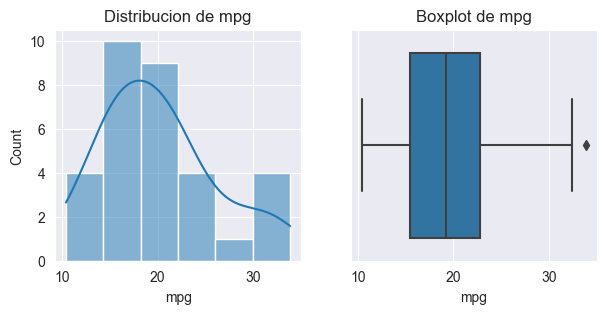

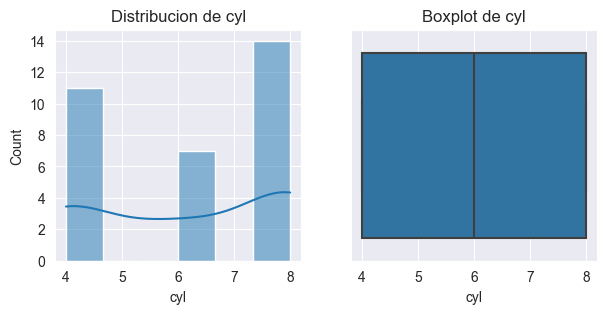

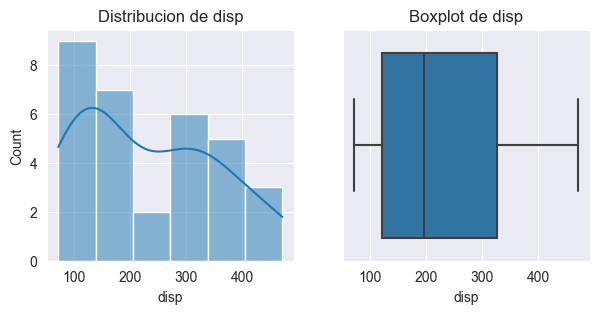

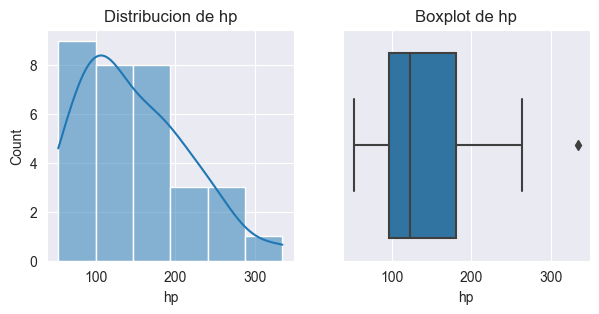

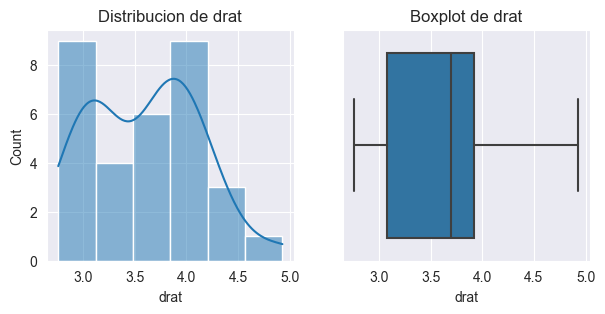

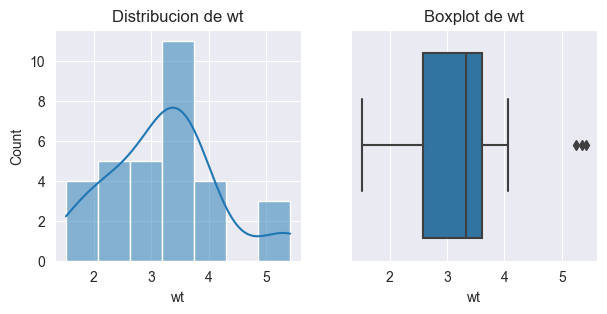

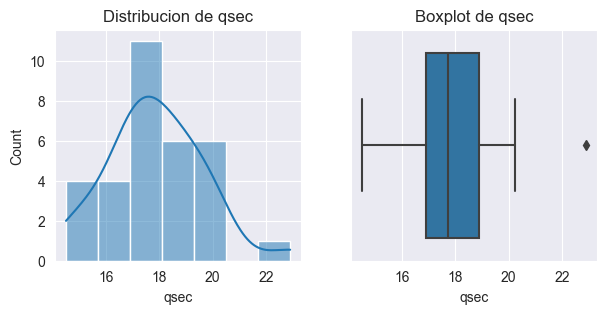

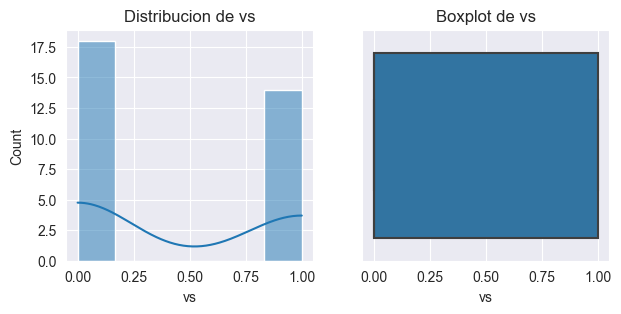

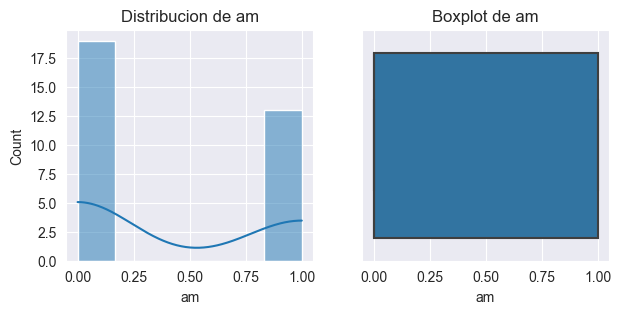

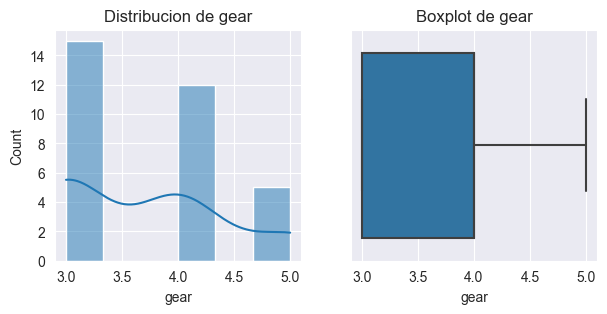

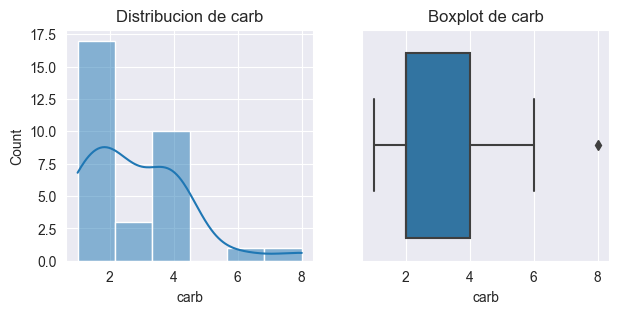

In [28]:
plt.figure(figsize=(10,10))
for i in df.describe().columns:
  distr_values(i)

In [29]:
df.sort_values(by = 'wt',ascending = False).head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Random_Category,Random_color
Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,CategoryB,azul
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,CategoryA,rojo
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,CategoryC,rojo
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,CategoryC,rojo
Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2,CategoryA,rojo


## Corr matrix

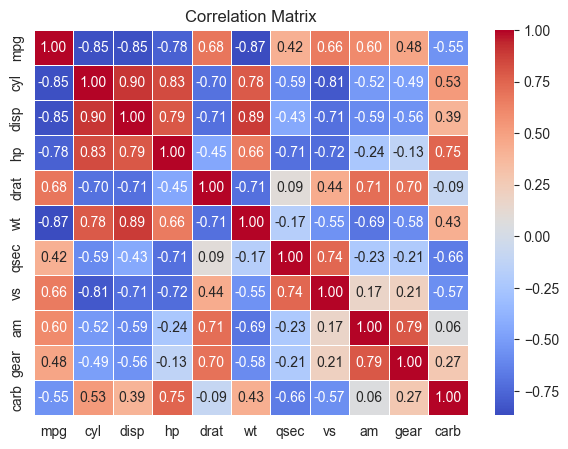

In [30]:
corr_matrix = df[columnas_numericas].corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Countplots, variables categoricas

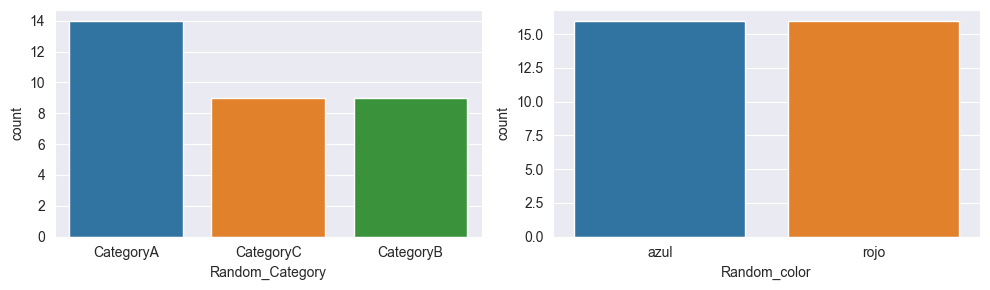

In [31]:
fig, ax = plt.subplots(1,2, figsize = (10,3))

for i, col in enumerate(columnas_categoricas):
  plt.subplot(1,2,i+1)
  sns.countplot(data=df, x=col)

plt.tight_layout()
plt.show()

# Seleccionar variables optimas

## Encoding

Chequear!!! Si hay variables ordinales, reemplazarlas a mano.

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
one_hot_encoder = OneHotEncoder()

one_hot_encoded = one_hot_encoder.fit_transform(df[columnas_categoricas])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(columnas_categoricas))
one_hot_encoded_df.index = df.index
df = pd.concat([df, one_hot_encoded_df], axis = 1).drop(columnas_categoricas, axis = 1)

## Seleccion de variables optimas

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
X = df.drop('mpg', axis = 1)
y = df['mpg']

In [36]:
estimador = LinearRegression()
seleccion = RFE(estimador, n_features_to_select=5)
seleccion.fit(X, y)

variables_significativas = seleccion.ranking_
print("ranking de las variables significativas seleccionadas:", variables_significativas)

#variables_significativas = X.columns[seleccion.support_]
print("variables significativas seleccionadas:", seleccion.support_)

ranking de las variables significativas seleccionadas: [10 11  9  1  1  5  1  1  3  2  1  4  6  8  7]
variables significativas seleccionadas: [False False False  True  True False  True  True False False  True False
 False False False]


In [37]:
X.columns[seleccion.support_]

Index(['drat', 'wt', 'vs', 'am', 'Random_Category_CategoryA'], dtype='object')

# Regresion Lineal

## Pipeline

In [56]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

def modelos_predictivos(model, parameters, X_train, y_train, X_test, y_test):

  kf = KFold(n_splits=5, shuffle=True)

  pipe = Pipeline(steps=[('standardscaler', StandardScaler()), ('selector', SelectKBest(f_classif)), ('classifier', model)])

  grid = GridSearchCV(pipe, parameters, cv=kf, scoring='r2') #Buscamos maximizar el precision
  grid.fit(X_train, y_train)

  y_train_pred = grid.predict(X_train)
  y_test_pred = grid.predict(X_test)

  # Compute R-squared
  r2_train = r2_score(y_train, y_train_pred)
  r2_test = r2_score(y_test, y_test_pred)

  # Compute MSE
  mse_train = mean_squared_error(y_train, y_train_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

  print("R-squared for training data:", r2_train)
  print("R-squared for test data:", r2_test)
  print("MSE for training data:", mse_train)
  print("MSE for test data:", mse_test)
  print("RMSE for training data:", rmse_train)
  print("RMSE for test data:", rmse_test)
  
  #print out the best parameters
  print(grid.best_params_)

In [ ]:
lr = LinearRegression()
parameters = {
    "classifier__n_jobs" : [0,1,2,3]
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)  # Your training and test data

lr = modelos_predictivos(lr, parameters, X_train, y_train, X_test, y_test)
lr

In [57]:
#xgboost regresion

from xgboost import XGBRegressor

xgb = XGBRegressor()

# Define the parameters for grid search
parameters = {
    "classifier__learning_rate": [0.01, 0.1, 0.2, 0.3],
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__n_estimators": [100, 200, 500, 1000]
}

# Use GridSearchCV with the XGBoost model and the defined parameters
xgb = modelos_predictivos(xgb, parameters, X_train, y_train, X_test, y_test)

R-squared for training data: 0.9999986789083468
R-squared for test data: 0.7694809773339542
MSE for training data: 3.342078640416462e-05
MSE for test data: 16.108292946315256
RMSE for training data: 0.0057810713889524514
RMSE for test data: 4.013513790472789
{'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
